In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_df=pd.read_excel('Gas Data processed.xlsx',sheet_name="code")
df=data_df.loc[1:97,["year", "coal_gen", "gas_gen", "price_gas", "price_brent","open_interest_gas", "ets"]] 
print(df)

              year  coal_gen  gas_gen   price_gas  price_brent  \
1   Quarter 2 1998   27.1609  26.3784   13.011204    18.739496   
2   Quarter 3 1998   25.9900  27.5545   19.397759    20.560224   
3   Quarter 4 1998   30.2032  32.6438   16.545961    14.665738   
4   Quarter 1 1999   29.1229  35.9817   12.819444    21.166667   
5   Quarter 2 1999   21.5152  32.0022   13.645117    24.085282   
..             ...       ...      ...         ...          ...   
91  Quarter 4 2020    1.2246  31.1309   51.601098    47.392498   
92  Quarter 1 2021    2.1945  32.3960   42.739726    58.027397   
93  Quarter 2 2021    0.6989  30.7469   77.430117    67.745717   
94  Quarter 3 2021    1.3825  28.9004  224.267857    70.107143   
95  Quarter 4 2021    1.7048  29.7824  149.553024    68.168273   

    open_interest_gas        ets  
1                 875        NaN  
2                3360        NaN  
3                6490        NaN  
4                2425        NaN  
5                2455        NaN

coal_gen


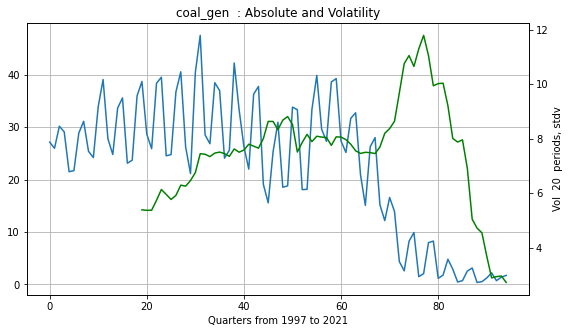

gas_gen


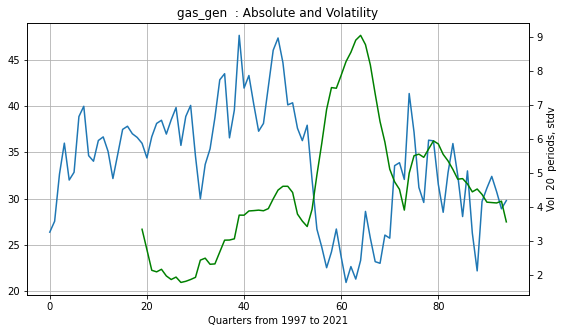

price_gas


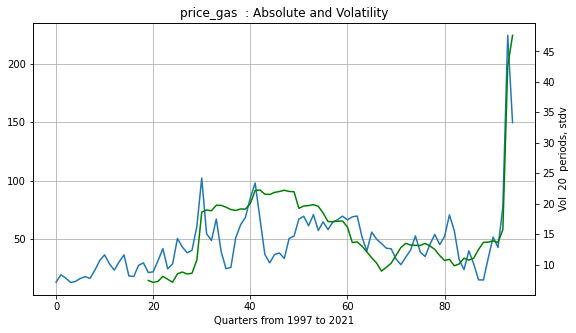

price_brent


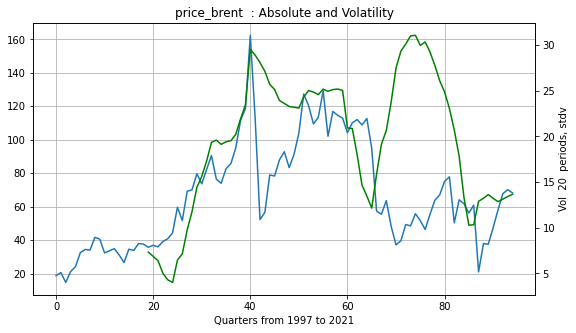

open_interest_gas


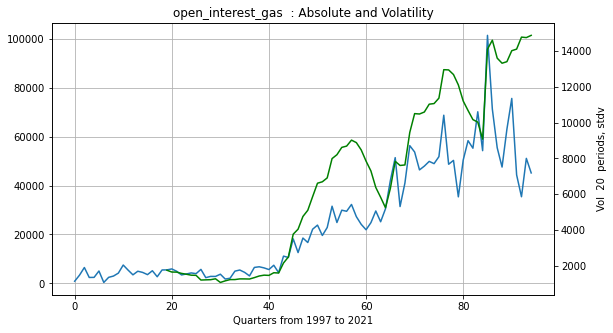

ets


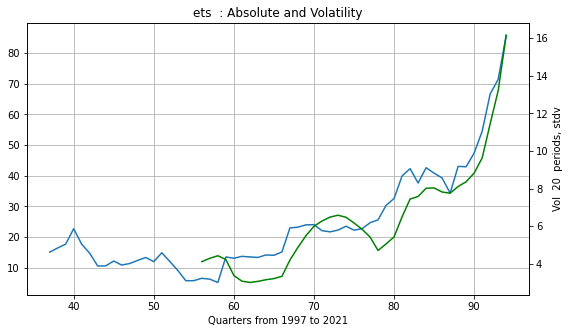

In [3]:
column_names = list(df.columns.values)
year = column_names.pop(0)
for name in column_names:
    print(name)
    col = df[name].values

    price_list=pd.Series(col) 
    var=20  #20 periods
    rollist=price_list.rolling(var) 
    rolvol=rollist.std(ddof=0) 

    plt.figure(figsize=(9, 5))
    plt.plot(col, label=name)
    plt.xlabel("Quarters from 1997 to 2021")
    plt.title(name + "  : Absolute and Volatility")
    plt.grid()

    plt2=plt.twinx()
    plt2.plot(rolvol, color="green")
    plt2.set_ylabel("Vol  " + str(var) + "  periods, stdv", color="black")    
    plt.show() 

coal_gen gas_gen


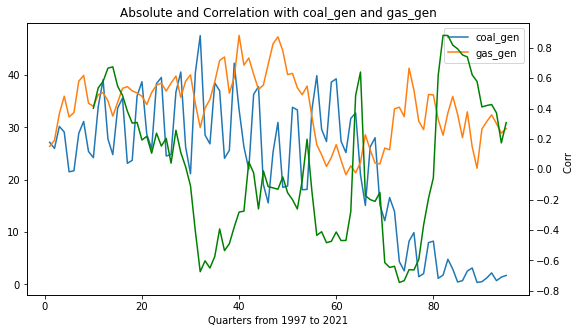

coal_gen price_gas


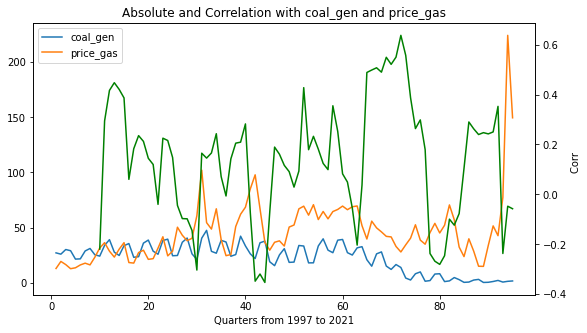

coal_gen price_brent


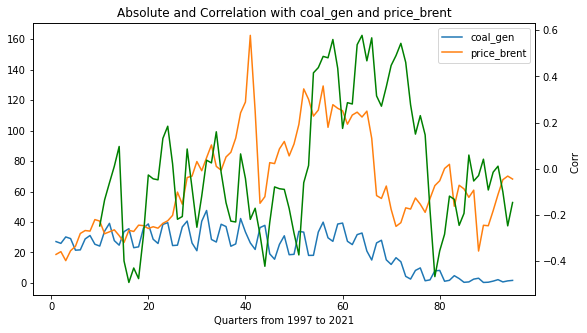

coal_gen open_interest_gas


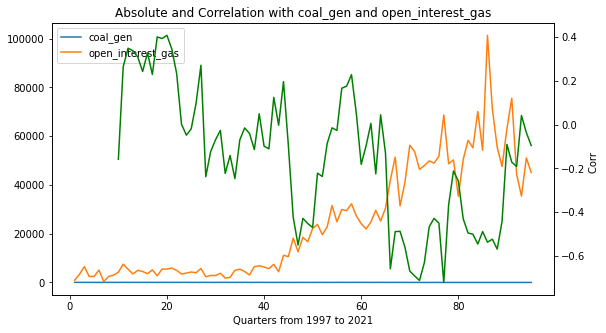

coal_gen ets


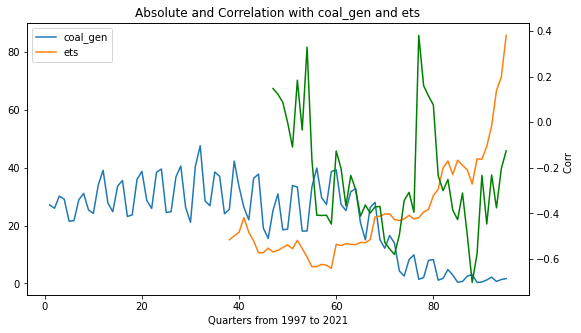

gas_gen price_gas


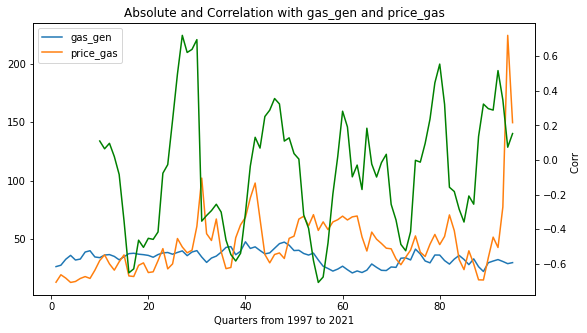

gas_gen price_brent


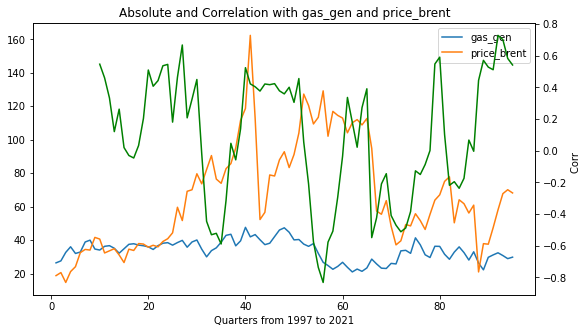

gas_gen open_interest_gas


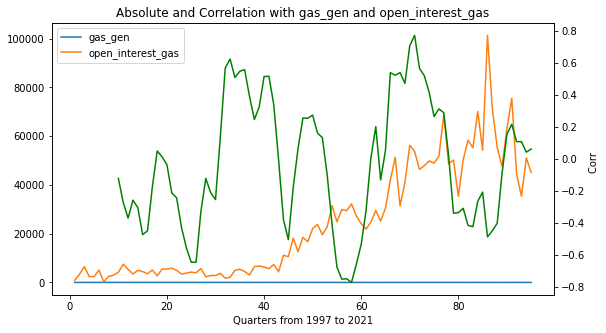

gas_gen ets


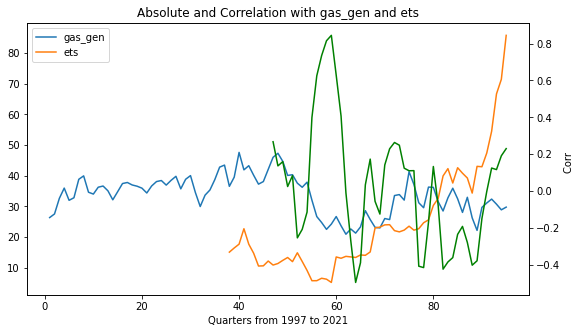

price_gas price_brent


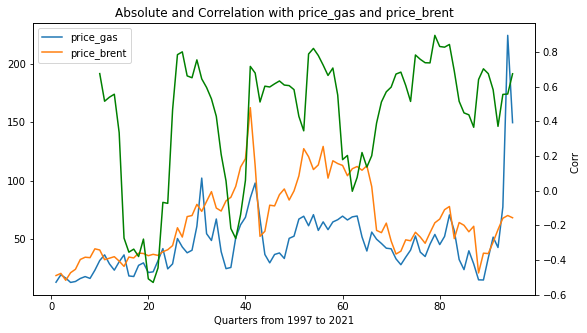

price_gas open_interest_gas


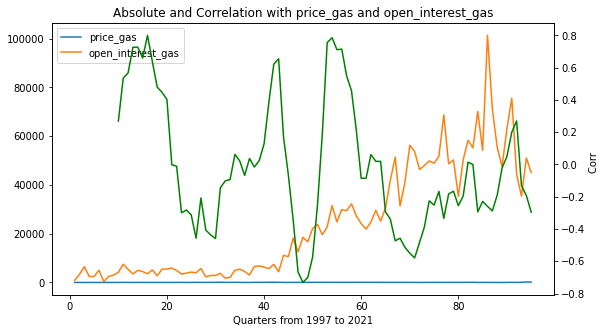

price_gas ets


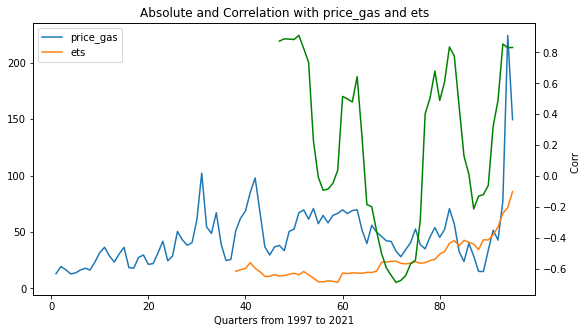

price_brent open_interest_gas


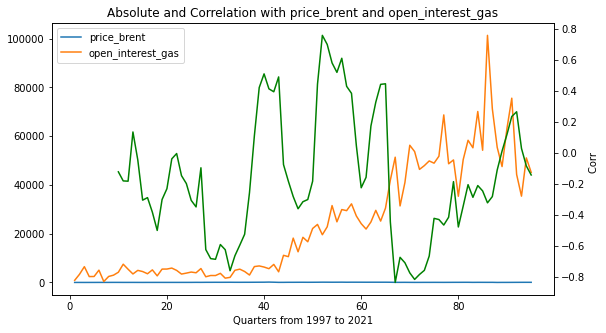

price_brent ets


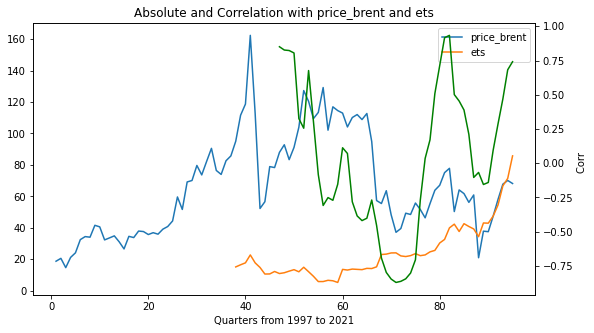

open_interest_gas ets


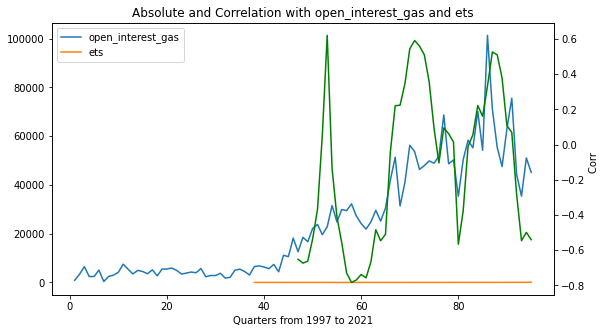

In [5]:
###### Rolling correlation ######

import itertools

comb_obj = itertools.combinations(column_names, 2)
comb_list = list(comb_obj)
# comb_list is all the 2 length combinations of the list of column names

length_rolling=10

for combination in comb_list:
    val1=combination[0]
    val2=combination[1]
    print(val1,val2)
    correlation = df[str(val1)].rolling(length_rolling).corr(df[str(val2)]) 
    # print(correlation)

    plt.figure(figsize=(9, 5))

    plt.plot(df[val1], label=str(val1))
    plt.plot(df[val2], label=str(val2))

    plt.xlabel("Quarters from 1997 to 2021")
    plt.title("Absolute and Correlation with " + val1 + " and " + val2)
    plt.legend()

    plt2=plt.twinx()
    plt2.plot(correlation, color="green")
    plt2.set_ylabel("Corr  ", color="black")    
    plt.show() 

    